# **Setup**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats

# **Dataset**

In [2]:
# Available Datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
iris = sns.load_dataset('iris')

print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.groupby('species').agg(['mean'])

,sepal_length,sepal_width,petal_length,petal_width
,mean,mean,mean,mean
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# **Miscellaneous Tests**

## **Normality Test**

**Hypothesis**
* Shapiro-Wilk Normality Test
* H0: Data is Normal
* Ha: Data Is Not Normal

**P-Value Interpretation**
* P-Value > $\alpha$   : Data Is Normally Distributed
* P-Value <= $\alpha$  : Data Is Not Normally Distributed  

In [18]:
from scipy.stats import shapiro

# Check for normality of the sepal_length data
statistic, p_value = shapiro(iris['sepal_length'])

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 0.98
P-Value: 0.01


In [19]:
from scipy.stats import shapiro

# Species: Setosa
# Check for normality of the sepal_length data 
statistic, p_value = shapiro(iris[iris['species']=='setosa']['sepal_length'])

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 0.98
P-Value: 0.46


## **Symmetry Test**
Wilcoxon Signed Rank Test (Non-Parametric)

**Hypothesis**
* H0: Data is symmetrically distributed
* Ha: Data is not symmetrically distributed



In [21]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon Signed Rank Test
statistic, p_value = wilcoxon(iris['sepal_length'] - 5.84,alternative='two-sided')

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 5621.00
P-Value: 0.94


## **Equality Of Variance**

Levene Test

**Hypothesis**
* H0: Sample_01 Variance = Sample_02 Variance
* Ha: Sample_01 Variance != Sample_02 Variance

In [25]:
iris.groupby('species')['sepal_length'].agg(['var'])

,var
species,
setosa,0.124249
versicolor,0.266433
virginica,0.404343


In [27]:
from scipy.stats import levene

sample01 = iris[iris['species']=='setosa']['sepal_length']
sample02 = iris[iris['species']=='versicolor']['sepal_length']

# Test the equality of variance
statistic, p_value = levene(sample01, sample02)

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 8.17
P-Value: 0.01


## **Equality Of Proportion**

Chi2 Test

In [30]:
pd.crosstab(iris['species'], iris['sepal_length'])

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
species,,,,,,,,,,,,,,,,,,,,,
setosa,1,3,1,4,2,5,4,8,8,3,...,0,0,0,0,0,0,0,0,0,0
versicolor,0,0,0,0,0,0,1,2,1,1,...,1,1,1,0,0,0,0,0,0,0
virginica,0,0,0,0,0,0,1,0,0,0,...,2,3,0,1,3,1,1,1,4,1


In [29]:
from scipy.stats import chi2_contingency

# Perform the Chi-Squared Test
statistic, p_value, dof, expected = chi2_contingency(pd.crosstab(iris['species'], iris['sepal_length']))

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 156.27
P-Value: 0.00


# **One Sample Data**

## **Z-Test**

**Note**
* If Sample has >= 30 Observation, Use Z-Test
* If Sample has <30 Observations, Use T-Test

In [17]:
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(iris['sepal_length'], value=5.84)

# Print the results
print("T-Statistic: {:.2f}".format(z_statistic))
print("P-Value: {:.2f}".format(p_value))

T-Statistic: 0.05
P-Value: 0.96


## **T-Test**

In [ ]:
# Data Sampling
data = iris['sepal_length'].sample(n=25)
print(data.shape)

(25,)


In [15]:
# Check Actual Sepal Length Mean
iris['sepal_length'].mean()

5.843333333333334

In [6]:
type(iris['sepal_length'].values)

numpy.ndarray

In [7]:
# Data Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Sepal_Len_Std = scaler.fit_transform(iris['sepal_length'].values.reshape(-1,1))

print(type(Sepal_Len_Std))
print('Standardized Data Shape: ',Sepal_Len_Std.shape)

<class 'numpy.ndarray'>
Standardized Data Shape:  (150, 1)


T-Statistic: 0.05
P-Value: 0.96


ValueError: Expected 2D array, got scalar array instead:
array=0.9607451200325001.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

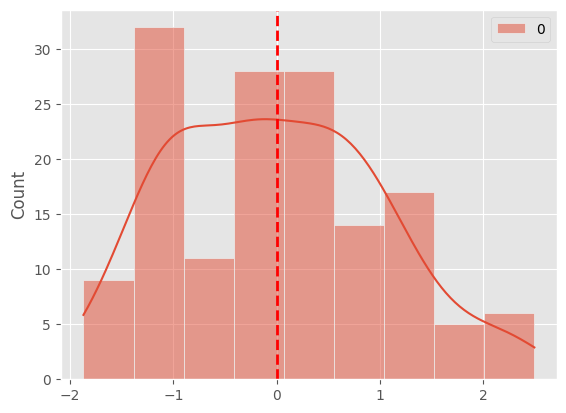

In [16]:
# T-Test To Check if Mean Sepal Length = 5.84
data = iris['sepal_length']
t_statistic, p_value = stats.ttest_1samp(a=data,popmean=5.84,alternative='two-sided')

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.2f}".format(p_value))

# Plot the distribution of sepal length values
data_std = scaler.fit_transform(iris['sepal_length'].values.reshape(-1,1))
sns.histplot(data_std, kde=True)
plt.axvline(data_std.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(scaler.inverse_transform(p_value), color='green', linestyle='dashed', linewidth=2)
plt.show()

# **Two Sample Data**

# **Three Sample**

## **One-Way ANOVA**

* To Check if Mean of 3 or More Samples is Equal

In [31]:
from scipy.stats import f_oneway

sample01 = iris[iris['species'] == 'setosa']['sepal_length']
sample02 = iris[iris['species'] == 'versicolor']['sepal_length']
sample03 = iris[iris['species'] == 'virginica']['sepal_length']

# Perform the one-way ANOVA test
statistic, p_value = f_oneway(sample01,sample02,sample03)

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 119.26
P-Value: 0.00


## **ANOVA Table**

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('sepal_length ~ species', data=iris).fit()

# Create the ANOVA table
table = sm.stats.anova_lm(model, typ=2)
table.loc['total',:] = [(table['sum_sq'].sum()),table['df'].sum(),0,0] # Add SST Row To ANOVA Table

# Print the ANOVA table
table

,sum_sq,df,F,PR(>F)
species,63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN
total,102.168333,149.0,0.000000,0.000000e+00
